# EDA
--------

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load training set

In [2]:
train = pd.read_csv('../data/train_80_10_10_doc_type.csv')

In [3]:
train.head()

,Unnamed: 0,Unnamed: 0.1,docid,cleaned_contents,Discrimination_Label,Customary_Practices,Gender_Stereotypes,Other_Factors,Num_Factors,doc_type,length
0,0,0,255849,SENTENCE\n \n \n• In a judgment delivered on ...,0,0,0,0,0,sentence,731
1,1,1,288617,"SENTENCE\n \n• ELIZABETH GOLMAN, you were cha...",1,0,0,1,1,sentence,594
2,2,2,78029,SENTENCE\n\n\t1.\tThe accused is before the Co...,1,0,1,0,1,sentence,1257
3,3,3,255988,SENTENCE\n \n_________________________________...,0,0,0,0,0,sentence,904
4,4,4,81960,SENTENCE\n\n1. The Director of Public Prosecut...,1,1,1,0,2,sentence,911


## Generate Fig (1)

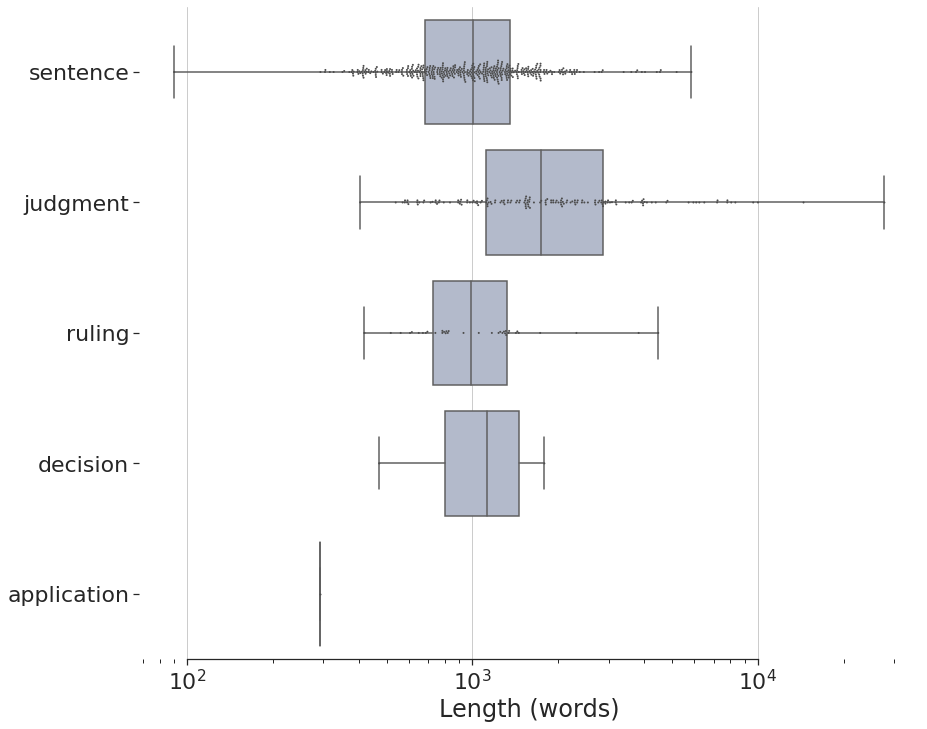

In [4]:
sns.set(style="ticks", font_scale=2)

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(14, 12))
ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="length", y="doc_type", data=train,
            whis=[0, 100], palette="vlag")

# Add in points to show each observation
sns.swarmplot(x="length", y="doc_type", data=train,
              size=2, color=".3", linewidth=0)

# Tweak the visual presentation
for box in ax.artists:
    box.set_facecolor("#b3bacb")
ax.xaxis.grid(True)
ax.set_xlabel('Length (words)')
ax.set(ylabel="")
sns.despine(trim=True, left=True)


## Compute prevalence of discrimination types for Table (2)

### First for the training set

In [5]:
train.Customary_Practices.sum() / len(train)

0.250386398763524

In [6]:
train.Discrimination_Label.sum() / len(train)

0.5795981452859351

In [7]:
train.Gender_Stereotypes.sum() / len(train)

0.3848531684698609

In [8]:
train.Other_Factors.sum() / len(train)

0.2828438948995363

### Then validation

In [9]:
val = pd.read_csv('../data/val_80_10_10_doc_type.csv')

In [10]:
val.Customary_Practices.sum() / len(val)

0.24691358024691357

In [11]:
val.Discrimination_Label.sum() / len(val)

0.5925925925925926

In [12]:
val.Other_Factors.sum() / len(val)

0.30864197530864196

In [13]:
val.Gender_Stereotypes.sum() / len(val)

0.32098765432098764